In [3]:



import tensorflow as tf 
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.activations import sigmoid
from keras.activations import leaky_relu

from keras.losses import binary_crossentropy

import  matplotlib.pyplot as plt 

from sklearn.datasets import make_classification


In [4]:


X,y = make_classification(n_samples=100,
                          n_features=2,
                          n_informative=1,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          class_sep=0.5,
                          random_state=42)
X.shape ,y.shape



((100, 2), (100,))

In [5]:
X[:5,:5]

array([[-0.01759094,  0.47383292],
       [-0.21508153, -0.03471177],
       [ 0.78804649,  0.71400049],
       [ 0.44900079,  0.62566735],
       [ 0.79443245, -0.44651495]])

In [6]:
y 

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

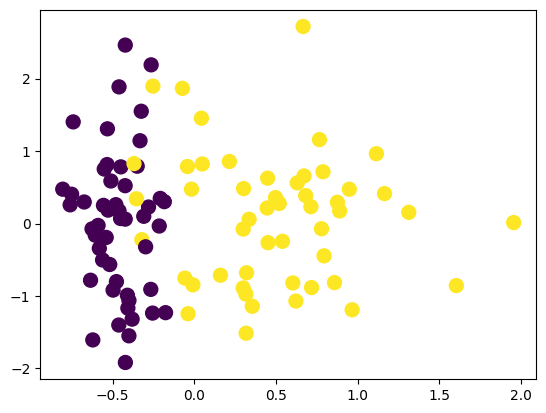

In [7]:

plt.scatter(x=X[:,0],y=X[:,1],c=y,s=100)
plt.show()


In [8]:




model = Sequential()
model.add(Dense(units=4,input_dim=2,activation=leaky_relu))
model.add(Dense(units=2,activation=leaky_relu))
model.add(Dense(units=1,activation=sigmoid))
model.summary()


/home/yasin/all_program/python-academic/venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-11 16:47:35.883239: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=20,random_state=42)

X_train.dtype,X_train.shape,y_train.shape,X_test.shape, y_test.shape


(dtype('float64'), (80, 2), (80,), (20, 2), (20,))

In [10]:

X_train = tf.convert_to_tensor(X_train,dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train,dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test,dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test,dtype=tf.float32)


X_train.dtype,X_train.shape,y_train.shape,X_test.shape, y_test.shape


(tf.float32,
 TensorShape([80, 2]),
 TensorShape([80]),
 TensorShape([20, 2]),
 TensorShape([20]))

In [11]:


model.compile(optimizer=Adam(learning_rate=0.001),
              loss=binary_crossentropy,metrics=["accuracy"])



In [12]:


history = model.fit(X_train,y_train,epochs=100,verbose=True,validation_data=(X_test,y_test))


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.7125 - loss: 0.6352 - val_accuracy: 0.7500 - val_loss: 0.6433
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7500 - loss: 0.6331 - val_accuracy: 0.8000 - val_loss: 0.6412
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7750 - loss: 0.6312 - val_accuracy: 0.8500 - val_loss: 0.6392
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7750 - loss: 0.6291 - val_accuracy: 0.8500 - val_loss: 0.6372
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7750 - loss: 0.6272 - val_accuracy: 0.8500 - val_loss: 0.6352
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8000 - loss: 0.6253 - val_accuracy: 0.9500 - val_loss: 0.6333
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8000 - loss: 0.6234 - val_accuracy: 0.9500 - val_loss: 0.6314
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8250 - loss: 0.6214 - val_accuracy: 0.9500 - val_loss

<Axes: >

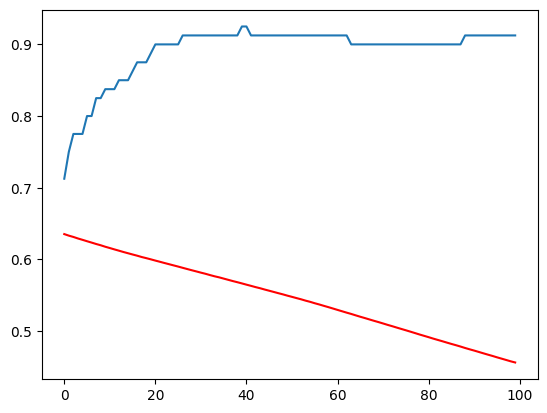

In [29]:
import seaborn as sns 

total_num_of_epoch = [i for i in range(0,100)]
fig, ax = plt.subplots(1,1)


sns.lineplot(x=total_num_of_epoch,y=history.history["loss"],c="red",ax=ax)
sns.lineplot(x=total_num_of_epoch,y=history.history["accuracy"],ax=ax)

